In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tamalero.KCU import KCU
from tamalero.ReadoutBoard import ReadoutBoard

from tamalero.SCA import SCA_CONTROL

# Initialize the control board (KCU105) and the RB prototype

In [3]:
kcu = KCU(name="my_device",
          ipb_path="ipbusudp-2.0://192.168.0.10:50001",
          adr_table="../module_test_fw/address_tables/etl_test_fw.xml")

kcu.status()

rb_0 = kcu.connect_readout_board(ReadoutBoard(0, trigger=False))

rb_0.configure()


LPGBT Link Status:
0x2011  r       READOUT_BOARD_0.LPGBT.DAQ.DOWNLINK.READY          0x00000001
0x2001  r       READOUT_BOARD_0.LPGBT.DAQ.UPLINK.READY            0x00000001
0x2001  r       READOUT_BOARD_0.LPGBT.DAQ.UPLINK.FEC_ERR_CNT      0x00000000
Parsing /home/daniel/module_test_sw/address_table/lpgbt.xml ...
Configuring eport dlls...


# Test some of the high level functions

We can easily read the temperature on the 3 temperature sensors:
- RT1 is on the top side, next to DAQ lpGBT
- RT2 is on the bottom side, below the DAQ lpGBT
- t_SCA is measured internally in the GBT-SCA

`verbose=1` shows the measured temperatures


In [7]:
temp = rb_0.read_temp(verbose=1)
temp


V_ref is set to: 1.000 V

Temperature on RB RT1 is: 33.411 C
Temperature on RB RT2 is: 34.143 C
Temperature on RB SCA is: 33.069 C


{'t1': 33.41052705580137, 't2': 34.14342263590112, 't_SCA': 33.06857401585566}

We can also look at the readings of all the connected ADC pins.
The mapping is defined in configs/SCA_mapping.yaml

In [8]:
rb_0.SCA.read_adcs()

register: 1V2_mon0    pin: 1    reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC0'
register: 1V2_mon1    pin: 3    reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC1'
register: 1V2_mon2    pin: 6    reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC2'
register: 1V2_mon3    pin: 9    reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC3'
register: 1V2_mon4    pin: 12   reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC4'
register: 1V2_mon5    pin: 15   reading: 0      in voltage: 0.0000    comment: 'monitoring for 1.2V of ETROC5'
register: BV0         pin: 18   reading: 2      in voltage: 0.5961    comment: 'monitoring for BV line 0'
register: BV1         pin: 21   reading: 2      in voltage: 0.5961    comment: 'monitoring for BV line 1'
register: BV2         pin: 28   reading: 2      in voltage: 0.5961    comment: 'monitoring for BV line 2'
register: 1V2A  

# Monitoring the temperature

We can monitor the temperature in real time using the animation package of matplotlib.

This is just a very first example and should be extended upon by:
- Adding all 3 temperature readings
- Adding a legend and proper axis labels


In [9]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib nbagg

<IPython.core.display.Javascript object>


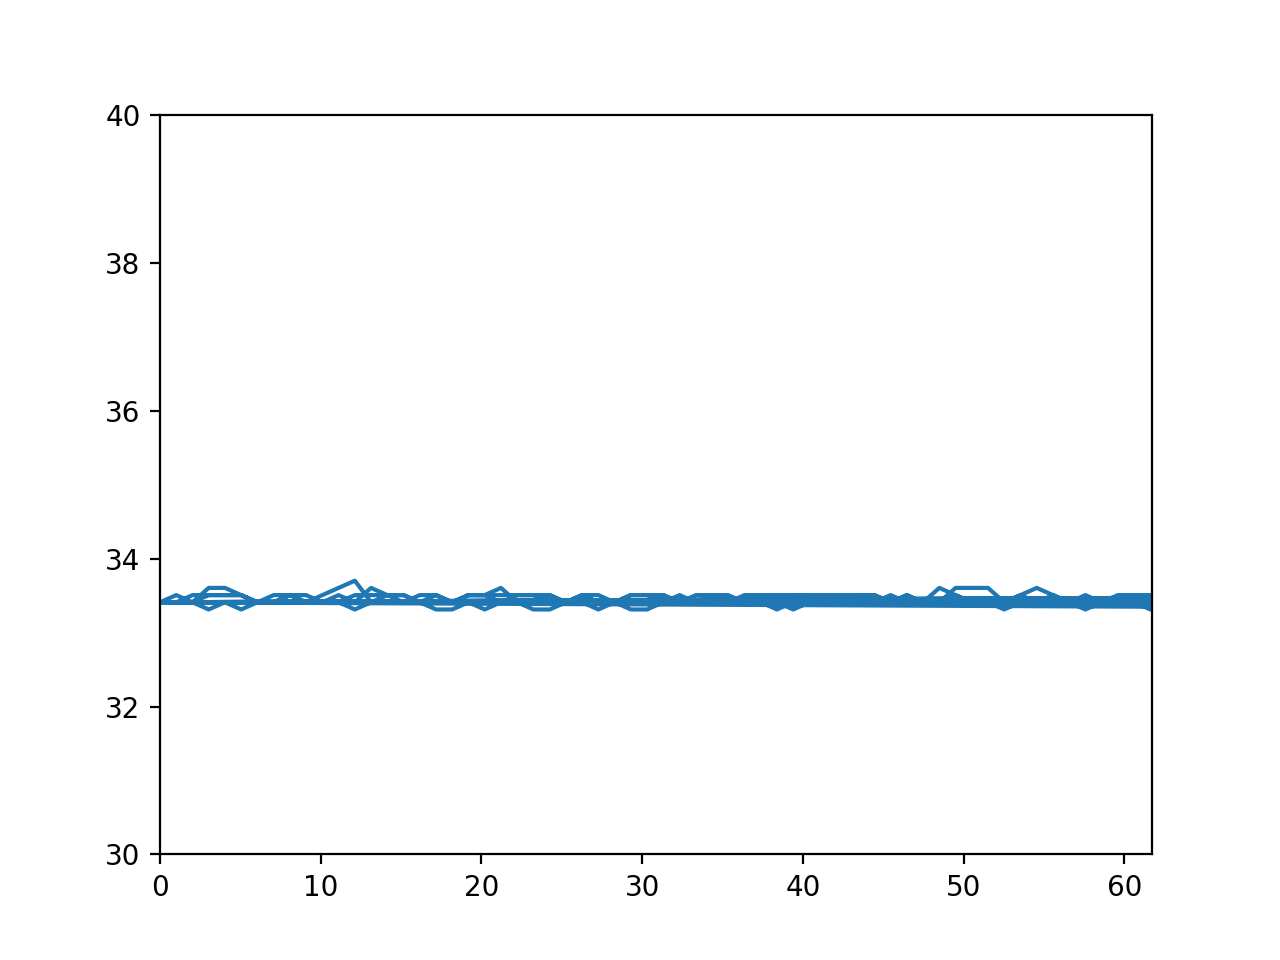

In [10]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [],'-')

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(30, 40)
    return ln,

def update(frame):
    temp = rb_0.read_temp(verbose=0)  # don't want to see the temp printed out, so verbose=0
    xdata.append(frame)
    ydata.append(temp['t1'])
    ln.set_data(xdata, ydata)
    ax.set_xlim(0, frame*1.3)
    return ln,

ani = FuncAnimation(fig, update,
                    frames=np.linspace(0, 100, 100),  # add 100 points from 0-100
                    init_func=init,
                    #blit=True,
                    interval=1000)  # update every 1000ms = 1s
plt.show()